<a href="https://colab.research.google.com/github/HiroshiATakano/QC_Kentei/blob/main/Level1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cómo recopilar y organizar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

path = os.getcwd()

try:
  os.chdir(path + '/drive/My Drive/QC_Kentei')
except:
  pass

os.getcwd()

'/content/drive/My Drive/QC_Kentei'

In [ ]:
!pip install japanize-matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

## 6.1

### Distribución hipergeométrica

要素の数 $ N $ 個のうち不適合品が $ M $ 個である有限母集団からランダムに $ n $ 個を抜き取る非復元抽出を行う場合、その中に含まれる不適合品の個数 $ x $ は超幾何分布に従う。

Cuando se realiza un muestreo sin reemplazo de $ n $ elementos de una población finita de $ N $ elementos, en la cual hay $ M $ elementos defectruosos, el número de elementos defectuosos $ x $ en la muestra sigue una distribución hipergeométrica.

La esperanza y la varianza de una variable aleatria $ x $ que sigue una distribución hipergeométrica

$ E(x) = \frac{nM}{N} $

$ V(x) = \frac{nM}{N}  (1 - \frac{M}{N}) (\frac{N-n}{N-1}) $

Si $ P = M/N $ se considera la tasa de defectuosos en la población, entonces la esperanza y la varianza mencionadas anteriormente son:

$ E(x) = nP $

$ V(x) = np(1-P)(\frac{N-n}{N-1}) $

Corrección finita (corrección por población finita: $ (\frac{N-n}{N-1}) $



Valor esperado (E[X]): 4.00
Varianza (Var(X)): 1.96


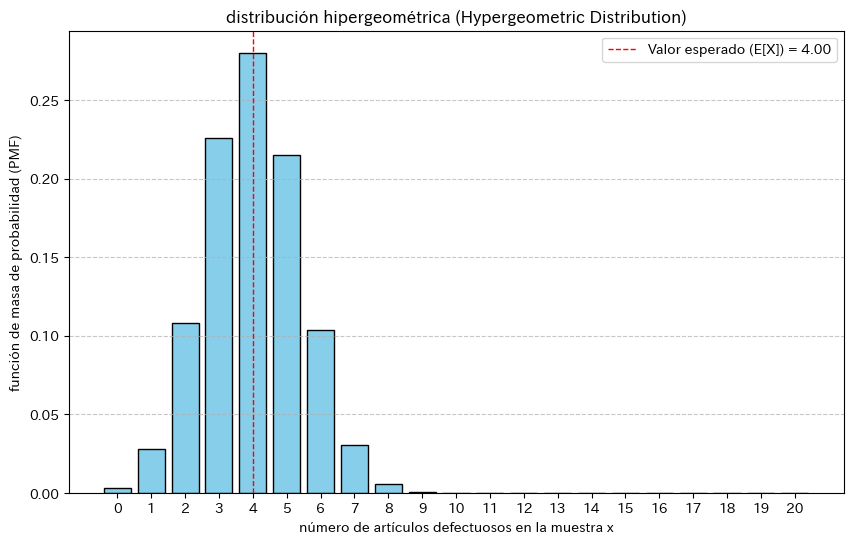

In [ ]:
from scipy.stats import hypergeom

# Configuración de parámetros
N = 50  # Tamaño total de la problación
M = 10  # Número de elementos defectuosos
n = 20  # Número de muestras a extraer

# distribución hipergeométrica
rv = hypergeom(N, M, n)

# Valor esperado y Varianza
expected_value = n * M / N
variance = (n * M / N) * (1 - M / N) * ((N - n) / (N - 1))

#
print(f"Valor esperado (E[X]): {expected_value:.2f}")
print(f"Varianza (Var(X)): {variance:.2f}")

# función de masa de probabilidad (PMF)
x = np.arange(0, n + 1)

# Cálculo de la función de masa de probabilidad (PMF) para cada x

pmf = rv.pmf(x)

# Creación del gráfico
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title('distribución hipergeométrica (Hypergeometric Distribution)')
plt.xlabel('número de artículos defectuosos en la muestra x')
plt.ylabel('función de masa de probabilidad (PMF)')
plt.xticks(np.arange(0, n + 1, 1))  #
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Valor esperado y Varianza
plt.axvline(expected_value, color='red', linestyle='dashed', linewidth=1, label=f'Valor esperado (E[X]) = {expected_value:.2f}')
plt.legend()
plt.show()


### Distribución binomial

有限母集団からの復元抽出を行う場合には $ x $ は二項分布に従う。

Cuando se realiza un muestreo con reemplazo de una población finita, $ x $ sigue una distribución binomial.


$ E(x) = nP $

$ V(x) = np(1-np) $


Valor esperado (E[X]): 4.00
Varianza (Var(X)): 3.20


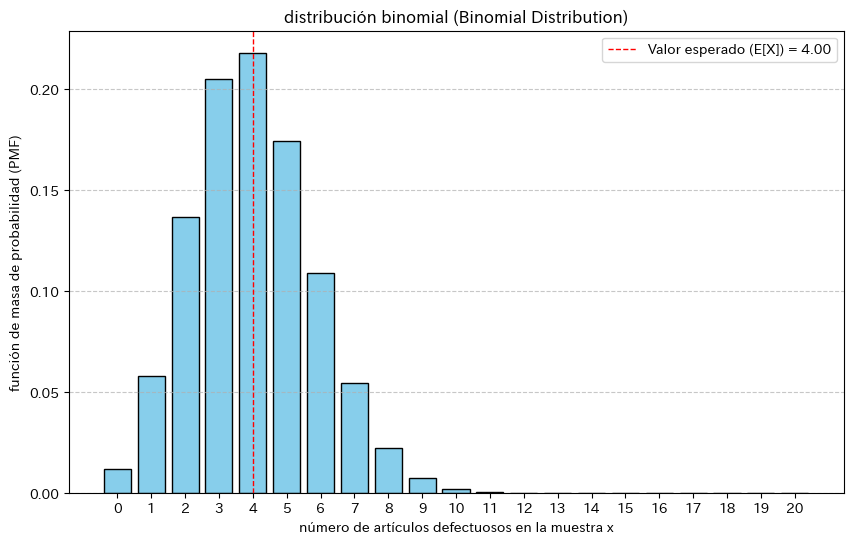

In [ ]:
from scipy.stats import binom

# Configuración de parámetros
N = 50  # Tamaño total de la población
M = 10  # Número de elementos defecuosos
n = 20  # Número de muestras a extraer

# Cálculo de la probabilidad de éxito
p = M / N  # Probabilidad de extraer elementos defectuosos

# distribución binomial
rv = binom(n, p)

# Valor esperado, Varianza
expected_value = n * p
variance = n * p * (1 - p)

#
print(f"Valor esperado (E[X]): {expected_value:.2f}")
print(f"Varianza (Var(X)): {variance:.2f}")

# función de masa de probabilidad (PMF)
x = np.arange(0, n + 1)

# Cálculo de la función de masa de probabilidad (PMF) para cada x
pmf = rv.pmf(x)

# Creación del gráfico
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title('distribución binomial (Binomial Distribution)')
plt.xlabel('número de artículos defectuosos en la muestra x')
plt.ylabel('función de masa de probabilidad (PMF)')
plt.xticks(np.arange(0, n + 1, 1))  #
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Valor esperado y Varianza
plt.axvline(expected_value, color='red', linestyle='dashed', linewidth=1, label=f'Valor esperado (E[X]) = {expected_value:.2f}')
plt.legend()
plt.show()


## 6.2

A工場に入荷する光学機器部品は、ひと箱に $ N=120 $ 入りで、$ M=12 $ 箱ずつ納入される。部品の特性 $ x $ が重要であるので、部品サンプリングを行い、特性 $ x $ の値を測定し平均値を求めている。納品される箱間の特性 $ x $ の分散を $ \sigma_b^2 $、箱内部品の特性 $ x $ の分散を $ \sigma_w^2 $、また $ \sigma_b^2 + \sigma_w^2 = \sigma^2 $ として、各サンプリングを検討する。

Las piezas de los equipos ópticos que llegan a la fábrica A se entregan en cajas con $ N=120 $ piezas por caja, y $ M=12 $ cajas por entrega. Dado que la características $ x $ de las piezas es importante, se realiza un muestreo de las piezas para medir el valor de la característica $ x $ y calcular el valor promedio. Se examimnarán las muestras, considerando la varianza de la carácteristica $ x $ entre las cajas, $ \sigma_b^2 $, la varianza de la característica $ x $ dentro de las piezas de una caja, $ \sigma_w^2 $, y la relacion $ \sigma_b^2 + \sigma_w^2 = \sigma^2 $.



### Muestreo en dos etapas

1. 入荷した $ M=12 $箱の中からランダムに $ m=4 $ 箱選び、選ばれた各箱内の部品 $ N=120 $ 個の中かられランダムに $ n=60 $ 個選んで、合計 $ mn=240 $ 個の特性 $ x $ をそれぞれ測定した。得られた特性 $ x $ の平均値を求める。なお、$ \sigma_b^2 = 2^2 $, $ \sigma_w^2 = 1^2  $ とする。得れらた特性 $ x $ の平均値を求める。


1. Se seleccionaron aleatoriamente $ m=4 $ cajas de las $ M=12 $ cajas recibidas, y dentro de cada una de las cajas seleccionadas, se eliqieron aleatoriamente $ n=60 $ piezas de las $ N=120 $ piezas. En total, se midieron las características $ x $ de $ mn=240 $ piezas. Se debe calcular el valor promedio de la característica $ x $ obtenida. Se debe que $ \sigma_b^2 = 2^2 $, $ \sigma_w^2 = 1^2 $.


Media de la caracteristica x: -0.01
Varianza de la caracteristica x: 1.02^2
Valianza total(con corrección por población finita aplicada): 0.85^2


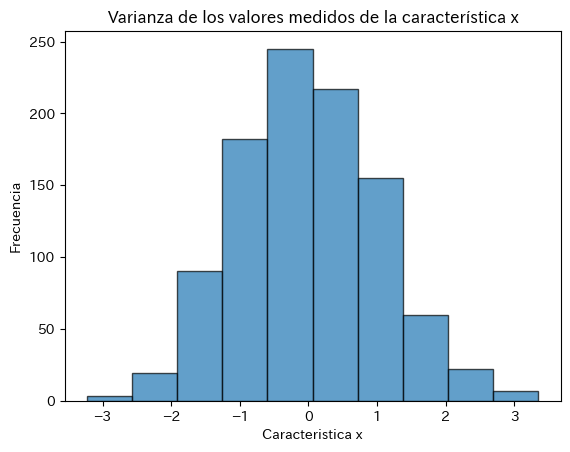

In [ ]:
# Configuración de constantes
M = 12  # Número de cajas
N = 120  # Número de piezas en cada caja
m = 4   # Número de cajas seleccionadas
n = 60  # Número de piezas seleccionadas de cada caja
sigma_b2 = 4  # Varianza entre cajas
sigma_w2 = 1  # Varianza dentro de cada caja

sample_means = []
for _ in range(1000):
    # Generación aleatoria del valor medio de cada caja (considerando la varianza enter cajas)
    box_means = np.random.normal(0, np.sqrt(sigma_b2), M)  # Cálculo del promedio de cada caja

    # Generación de la caracteristicas x de las piezas cada caja (considerando la varianza dentro de la caja)
    samples = []
    for i in range(M):
        box_samples = np.random.normal(box_means[i], np.sqrt(sigma_w2), N)  # Aplicación de la varianza dentro de caja
        samples.append(box_samples)

    # Selección aleatoria de m=4
    selected_boxes = np.random.choice(M, m, replace=False)

    # Selección de n=60 piezas dentro de las cajas seleccionadas y medición de la caracteristica x
    selected_samples = []
    for box in selected_boxes:
        selected_samples.extend(np.random.choice(samples[box], n, replace=False))
     # Cálculo del valor medio de la caracteristica x
    sample_means.append(np.mean(selected_samples))

print(f"Media de la caracteristica x: {np.mean(sample_means):.2f}")
print(f"Varianza de la caracteristica x: {np.sqrt(np.var(sample_means, ddof=1)):.2f}^2")

# Cálculo de la varianza (aplicando la corrección por población final)
var_between = (sigma_b2 / m)*((M-m)/(M-1))  # Varianza entre cajas
var_within = (sigma_w2 / (m * n)) * ((N - n) / (N - 1))  # Varianza total (con corrección por población finita aplicada)

# Varianza
total_variance = var_between + var_within
print(f"Valianza total(con corrección por población finita aplicada): {np.sqrt(total_variance):.2f}^2")

#
plt.hist(sample_means, bins=10, edgecolor='black', alpha=0.7)
#plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f"平均: {sample_mean:.2f}")
plt.title('Varianza de los valores medidos de la característica x')
plt.xlabel('Caracteristica x')
plt.ylabel('Frecuencia')
plt.show()


### Muestreo por conglomerados

2. 入荷した $ M=12 $ 箱の中からランダムに $ m=2 $ 箱をえらび、選ばれた各箱内の部品 $ N=120 $ 個をすべて選んで、合計 $ mN = 240 $ の特性 $ x $ をそれぞれ測定した。得られた特性 $ x $ の平均値 $ \bar{x} $ を求める。


2. Se seleccionaron aleatoriamente $ m=2 $ cajas de un total de $ M=12 $ cajas recibidas. Luego, se eligieron todos los $ N=12 $ cajas recibidos. Luego, se eligieron todos los $ N=120 $ componentes dentro de cada caja seleccionada, midiendo así un total de $ mN=240 $ valores de la caracteristica $ x $. Finalmente, se calculó el valor medio $ \bar{x} $ de la característica $ x $ obtenida.

Medio de la caracteristica x: 0.04
Varianzs de la caracteristica x: 1.45^2
Varianza dentro de las cajas (con corrección por población finita): 1.35^2


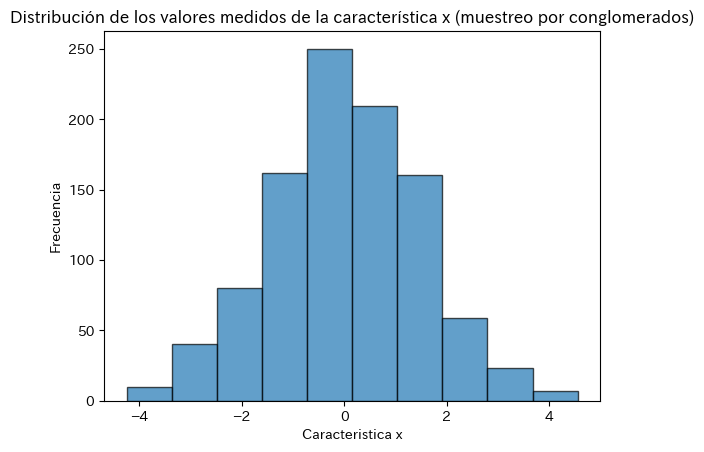

In [ ]:
# Configuración de constantes
M = 12  # Número de cajas
N = 120  # Número de piezas en cada caja
m = 2   # Número de cajas seleccionadas
n = 120 # Número de piezas seleccionadas de cada caja
sigma_b2 = 4  # Varianza entre cajas
sigma_w2 = 1  # Varianza dentro de cada caja

sample_means = []
for _ in range(1000):
    # Generación aleatoria del valor medio de cada caja (considerando la varianza entre cajas)
    box_means = np.random.normal(0, np.sqrt(sigma_b2), M)  # Cálculo del promedio de cada caja

    # Generación de las caracteristicas x de las piezas en cada caja (considerand la varianza dentro de la caja)
    samples = []
    for i in range(M):
        box_samples = np.random.normal(box_means[i], np.sqrt(sigma_w2), N)  # Aplicación de la varianza dentro de la caja
        samples.append(box_samples)

    # Selección aleatoria de m=2
    selected_boxes = np.random.choice(M, m, replace=False)

    # Medición de todas las piezas de las cajas seleccionadas
    selected_samples = []
    for box in selected_boxes:
        selected_samples.extend(samples[box])

    # Cálculo del valor medio de la caracteristica x
    sample_means.append(np.mean(selected_samples))

print(f"Medio de la caracteristica x: {np.mean(sample_means):.2f}")
print(f"Varianzs de la caracteristica x: {np.sqrt(np.var(sample_means, ddof=1)):.2f}^2")

# Cálculo del varianza (aplicando la corrección por población final)
n = N
var_between = (sigma_b2 / m)*((M-m)/(M-1))  # Análisis entre cajas
var_within = (sigma_w2 / (m * n)) * ((N - n) / (N - 1))  # Varianza dentro de las cajas (corrección por población final)

# Varianza entre cajas
total_variance = var_between + var_within
print(f"Varianza dentro de las cajas (con corrección por población finita): {np.sqrt(total_variance):.2f}^2")

#
plt.hist(sample_means, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribución de los valores medidos de la característica x (muestreo por conglomerados)')
plt.xlabel('Caracteristica x')
plt.ylabel('Frecuencia')
plt.show()


### Muestreo estratificado

3. 入荷した $ M = 12 $ 箱すべての中からそれぞれランダムに $ n = 20 $ 個を選んで合計 $ Mn = 240 $ 個の特性 $ x $をそれぞれ測定した。得られた $ x $の平均値 $ \bar{x} $を求める。このサンプリングは層別サンプリングとよばれる。


3. Se seleccionaron aleatoriamente $ n=12 $ piezas de cada una de las $ M=20 $ cajas recibidas, obteniendo un total de $ Mn=240 $ mediciones de la caracteristica $ x $. Se calculó el valor medio $ \bar{x} $ de los valores obtenidos. Este tipo de muestreo se denomina muestreo estratificado.

Media de la característica x: 0.03
Varianza de la característica x: 0.57^2
Varianza total (con corrección por población finita aplicada): 0.059^2


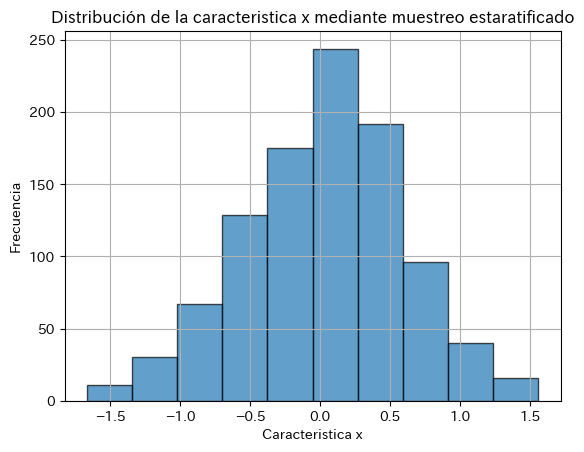

In [ ]:
# Configuración de constantes
M = 12  # Número de cajas
N = 120 # Número de piezas en cada caja
n = 20  # Número de piezas seleccionadas de cada caja
m = 12  # Número de cajas seleccionadas

#
sigma_b2 = 4  # Varianza entre cajas
sigma_w2 = 1  # Varianza dentro de cada caja

sample_means = []
for _ in range(1000):
    # Generación de datos de muestreo estratificado
    mu_global = 0  # Medio total

    # Establecimiento de valores medios diferentes para cada caja
    box_means = np.random.normal(mu_global, np.sqrt(sigma_b2), M)

    # Generación de datos de las piezas en cada caja
    data = [np.random.normal(mean, np.sqrt(sigma_w2), N) for mean in box_means]

    # Extración aleatoria de n datos de cada caja
    sampled_data = [np.random.choice(box, n, replace=False) for box in data]

    # Reunión de todas las muestras
    flattened_samples = np.concatenate(sampled_data)

    # Cálculo de la media
    x_bar = np.mean(flattened_samples)

    # Cálculo de la media de la caracteristica x
    sample_means.append(x_bar)

print(f"Media de la característica x: {np.mean(sample_means):.2f}")
print(f"Varianza de la característica x: {np.sqrt(np.var(sample_means, ddof=1)):.2f}^2")

# Cálculo de la varianza (aplicando la corrección por población finita)
m = M
var_between = (sigma_b2 / m)*((M-m)/(M-1))  # Varianza entre cajas
var_within = (sigma_w2 / (m * n)) * ((N - n) / (N - 1))  # Varianza dentro de las cajas (corrección por población finita)

# Varianza total
total_variance = var_between + var_within
print(f"Varianza total (con corrección por población finita aplicada): {np.sqrt(total_variance):.3f}^2")

#
plt.hist(sample_means, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Caracteristica x')
plt.ylabel('Frecuencia')
plt.title('Distribución de la caracteristica x mediante muestreo estaratificado')
plt.grid()
plt.show()


La principal ventaja del muestreo estratificado es minimizar el impacto de la variabilidad entre las cajas, lo que reduce la disperción total del la muestra. Esto permite mejorar la precisión incluso con un menor tamaño de muestra.

### Muestreo aleatorio simple

4. 入荷した $ MN=1440 $ 個すべての中からランダムに$ n=240 $ 個選んで２４０個の特性ｘをそれぞれ測定した。得られた特性 $ x $ の平均値 $ \bar{x} $ を求める。このサンプリングは単純ランダムサンプリングと呼ばれる。


4. Se seleccionaron aleatoriamente $ n=240 $ piezas de un total de $ MN=1440 $ piezas recibidas, y se medió la caracteritica $ x $ de cada una. Se calculó el valor medio $ \bar{x} $ de la caracteristica $ x $ obtenida. Este tipo de muestreo se denomina muestreo aleatorio simple.

Media de la característica x: 0.04
Varianza de la característica x: 0.59^2
Varianza teórica (considerando el coeficiente de coorección por población final): 0.53^2


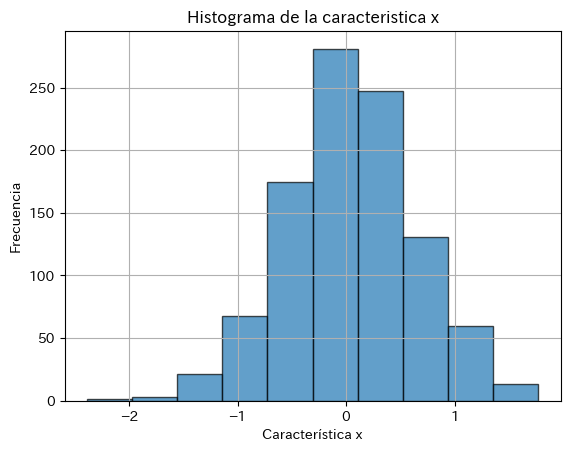

In [ ]:
# Configuración de constantes
N = 120   # Número de ipezas en cada caja
M = 12    # Número de  cajas
n = 240   # Número de piezas selecciodas de cada caja
sigma_b = 4  # Varianza entre cajas
sigma_w = 1  # Varianza dentro de cada caja

sample_means = []
for _ in range(1000):
    # Generación aleatoria del valor medio de cada caja (considerando la varianza entre cajas)
    box_means = np.random.normal(0, np.sqrt(sigma_b2), M)  # Cálculo del promedio de cada caja

    # Generación aleatoria del valor medio de cada caja (considerando la varianza entre cajas)
    samples = []
    for i in range(M):
        box_samples = np.random.normal(box_means[i], np.sqrt(sigma_w2), N)  # 箱内の分散を適用
        samples.append(box_samples)

    nested_array = np.array(samples)
    flat_array = nested_array.flatten()
    # Seleccionar aleatoriamente 240 piezas
    selected_samples = np.random.choice(flat_array, size=n, replace=False)

    # Cálculo del promedio
    x_bar = np.mean(selected_samples)

    # Cálculoar la media de la caracteristica x
    sample_means.append(x_bar)

print(f"Media de la característica x: {np.mean(sample_means):.2f}")
print(f"Varianza de la característica x: {np.sqrt(np.var(sample_means, ddof=1)):.2f}^2")


# Cálculo teórico de la varianza
fpc = (M * N - n) / (M * N - 1)  # Coeficiente de corrección por población por población final)
theoretical_variance = (sigma_b / M + sigma_w / n) * fpc
print(f"Varianza teórica (considerando el coeficiente de coorección por población final): {np.sqrt(theoretical_variance):.2f}^2")

# Crear el istograma de la característica x
plt.hist(sample_means, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histograma de la caracteristica x')
plt.xlabel('Característica x')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
